## 1 - Business Understanding

##### The goal of this project is to predict whether a student will be admitted to a university based on exam scores and academic background. This helps universities streamline the admissions process and allows students to assess their chances of acceptance. The data mining objective is to develop a logistic regression model to predict admission probability, with performance evaluated using accuracy, precision, recall, F1-score, AUC, and log-loss. Success will be measured by high predictive performance on the test dataset, ensuring the model generalizes well to real-world scenarios.

## 2 - Data understanding 

<a name="1"></a>
### 2.1 - Packages 

First, let's run the cell below to import all the packages that we will need during this project.
- [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a famous library to plot graphs in Python.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import copy
import math

%matplotlib inline

### 2.2 - Load Data

In [9]:
filename = r'C:\Users\HOME\Desktop\admission prediction\Admission_Predict.csv'
data = pd.read_csv(filename)

### 2.3 - Explore Data

In [10]:
# Get the shape of the dataset
print("Shape of the dataset:", data.shape)
# View the first few rows of the dataset
print(data.head())

Shape of the dataset: (400, 9)
   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  \
0           1        337          118                  4  4.5  4.5  9.65   
1           2        324          107                  4  4.0  4.5  8.87   
2           3        316          104                  3  3.0  3.5  8.00   
3           4        322          110                  3  3.5  2.5  8.67   
4           5        314          103                  2  2.0  3.0  8.21   

   Research  Chance of Admit  
0         1                1  
1         1                1  
2         1                0  
3         1                1  
4         0                0  


In [11]:
# Get summary statistics of the dataset
print(data.describe())
# Get information about the dataset, including data types
print(data.info())

       Serial No.   GRE Score  TOEFL Score  University Rating         SOP  \
count  400.000000  400.000000   400.000000         400.000000  400.000000   
mean   200.500000  316.807500   107.410000           3.087500    3.400000   
std    115.614301   11.473646     6.069514           1.143728    1.006869   
min      1.000000  290.000000    92.000000           1.000000    1.000000   
25%    100.750000  308.000000   103.000000           2.000000    2.500000   
50%    200.500000  317.000000   107.000000           3.000000    3.500000   
75%    300.250000  325.000000   112.000000           4.000000    4.000000   
max    400.000000  340.000000   120.000000           5.000000    5.000000   

              LOR        CGPA    Research  Chance of Admit  
count  400.000000  400.000000  400.000000       400.000000  
mean     3.452500    8.598925    0.547500         0.450000  
std      0.898478    0.596317    0.498362         0.498117  
min      1.000000    6.800000    0.000000         0.000000  
2

In [12]:
# Unique values in the Admission Decision column
print("unique values of GRE Score :\n " , data['GRE Score'].unique())
print("\nunique values of TOEFL Score :\n" ,data['TOEFL Score'].unique())
print("\nunique values of CGPA :\n",data['CGPA'].unique())

unique values of GRE Score :
  [337 324 316 322 314 330 321 308 302 323 325 327 328 307 311 317 319 318
 303 312 334 336 340 298 295 310 300 338 331 320 299 304 313 332 326 329
 339 309 315 301 296 294 306 305 290 335 333 297 293]

unique values of TOEFL Score :
 [118 107 104 110 103 115 109 101 102 108 106 111 112 105 114 116 119 120
  98  93  99  97 117 113 100  95  96  94  92]

unique values of CGPA :
 [9.65 8.87 8.   8.67 8.21 9.34 8.2  7.9  8.6  8.4  9.   9.1  8.3  8.7
 8.8  8.5  9.5  9.7  9.8  9.6  7.5  7.2  7.3  8.1  9.4  9.2  7.8  7.7
 9.3  8.85 7.4  7.6  6.8  8.92 9.02 8.64 9.22 9.16 9.64 9.76 9.45 9.04
 8.9  8.56 8.72 8.22 7.54 7.36 8.02 9.36 8.66 8.42 8.28 8.14 8.76 7.92
 7.66 8.03 7.88 7.84 8.96 9.24 8.88 8.46 8.12 8.25 8.47 9.05 8.78 9.18
 9.46 9.38 8.48 8.68 8.34 8.45 8.62 7.46 7.28 8.84 9.56 9.48 8.36 9.32
 8.71 9.35 8.65 9.28 8.77 8.16 9.08 9.12 9.15 9.44 9.92 9.11 8.26 9.43
 9.06 8.75 8.89 8.69 7.86 9.01 8.97 8.33 8.27 7.98 8.04 9.07 9.13 9.23
 8.32 8.98 8.94 9.53 8.52

In [13]:
print(data['Chance of Admit'].value_counts())

Chance of Admit
0    220
1    180
Name: count, dtype: int64


In [14]:
# Average scores by admission decision
avg_scores = data.groupby('Chance of Admit')[['GRE Score', 'TOEFL Score']].mean()
print(avg_scores)


                  GRE Score  TOEFL Score
Chance of Admit                         
0                309.695455   103.722727
1                325.500000   111.916667


##### Correlation Matrix

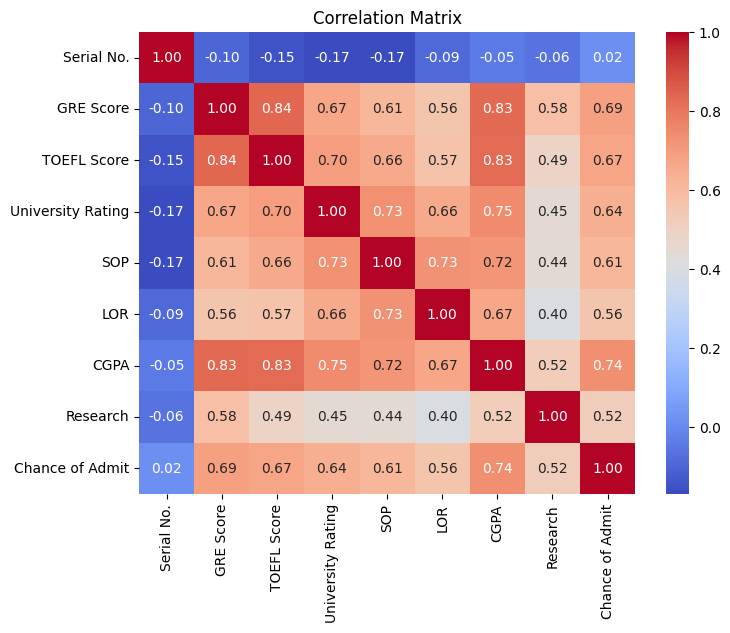

In [15]:
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


##### Distribution of Scores:

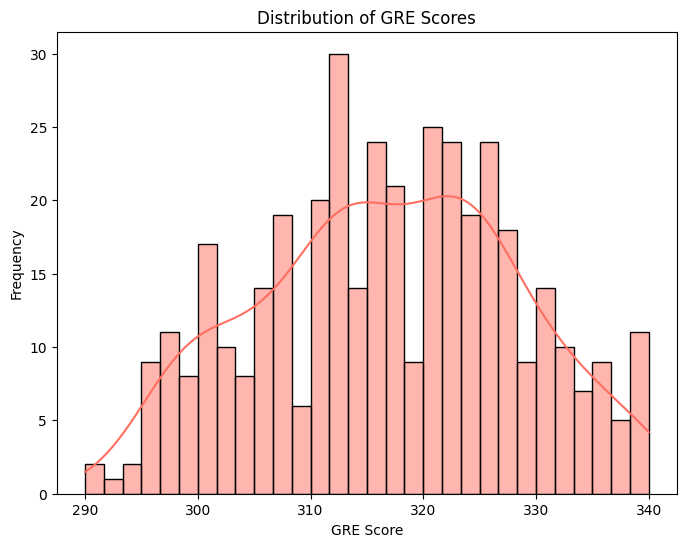

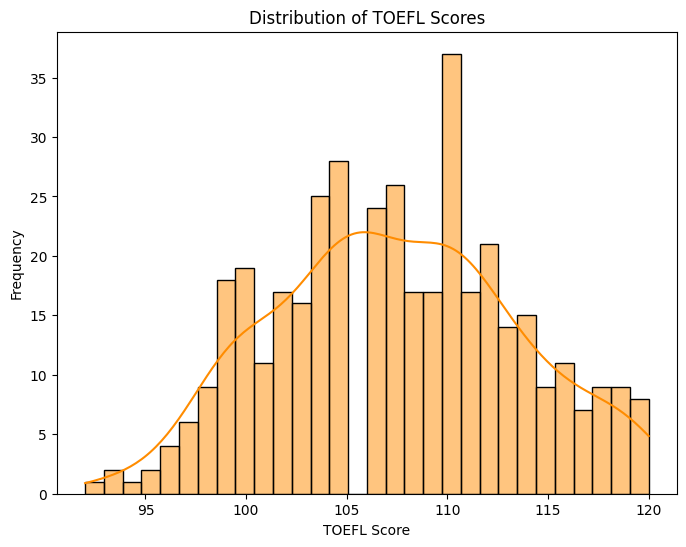

In [16]:
# Histogram for GRE Scores
plt.figure(figsize=(8, 6))
sns.histplot(data['GRE Score'], bins=30, kde=True, color='#FF6F61')
plt.title("Distribution of GRE Scores")
plt.xlabel("GRE Score")
plt.ylabel("Frequency")
plt.show()

# Histogram for TOEFL Scores
plt.figure(figsize=(8, 6))
sns.histplot(data['TOEFL Score'], bins=30, kde=True, color='#FF8C00')
plt.title("Distribution of TOEFL Scores")
plt.xlabel("TOEFL Score")
plt.ylabel("Frequency")
plt.show()


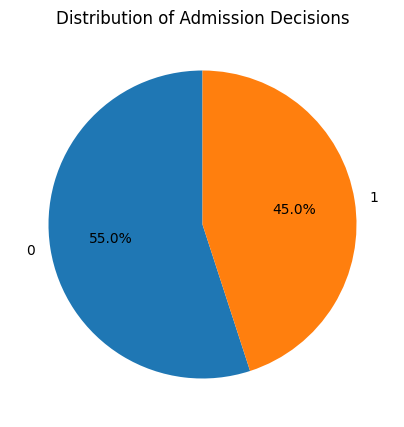

In [17]:
# Pie chart for the distribution of admission decisions
plt.figure(figsize=(5, 5))
data['Chance of Admit'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Admission Decisions")
plt.ylabel("")  # Remove the y-label
plt.show()


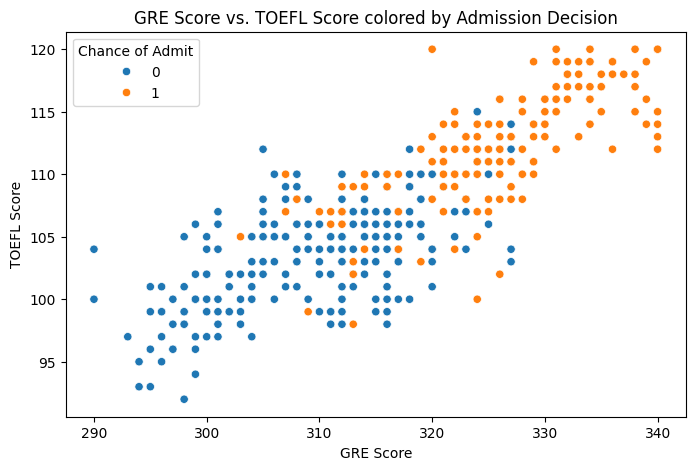

In [18]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='GRE Score', y='TOEFL Score', hue='Chance of Admit', data=data)
plt.title("GRE Score vs. TOEFL Score colored by Admission Decision")
plt.xlabel("GRE Score")
plt.ylabel("TOEFL Score")
plt.show()


#####  Relationship between Scores and Admission

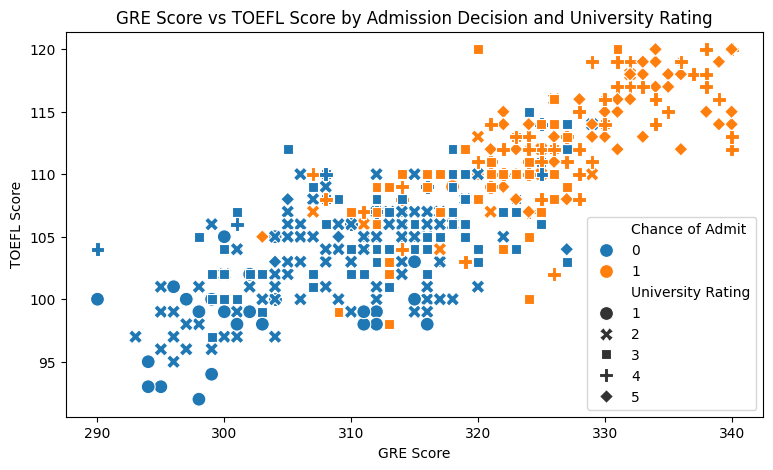

In [19]:
# Scatter plot of GRE vs TOEFL Score
plt.figure(figsize=(9, 5))
sns.scatterplot(x='GRE Score', y='TOEFL Score', hue='Chance of Admit', style='University Rating', data=data, s=100)
plt.title("GRE Score vs TOEFL Score by Admission Decision and University Rating")
plt.xlabel("GRE Score")
plt.ylabel("TOEFL Score")
plt.show()


## 3 - Data Preparation

### 3.1 Data Cleaning

In [20]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values in Each Column:\n", missing_values)

Missing Values in Each Column:
 Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


In [21]:
# Check for duplicate entries
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [22]:
print(data.columns)

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')


In [ ]:
columns_to_drop = ['Serial No.','Total Score','admitted']  # Add any additional columns you want to drop

# Drop the specified columns
data.drop(columns=columns_to_drop, inplace=True)

In [23]:
print(data.columns)

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')


### 3.2 Feature Engineering Insights

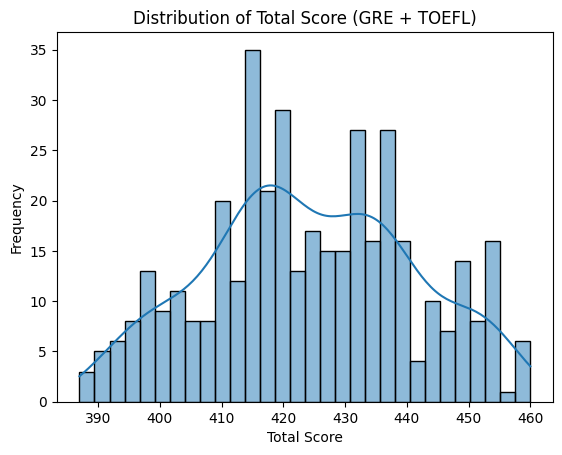

In [24]:
# For example, create a new feature based on scores
data['Total Score'] = data['GRE Score'] + data['TOEFL Score']
sns.histplot(data['Total Score'], bins=30, kde=True)
plt.title("Distribution of Total Score (GRE + TOEFL)")
plt.xlabel("Total Score")
plt.ylabel("Frequency")
plt.show()


In [25]:
print(data.columns)

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit', 'Total Score'],
      dtype='object')


### 3.3 Feature selection

In [26]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Select features that correlate with the target variable 'Chance of Admit'
target_correlation = correlation_matrix['Chance of Admit']
relevant_features = target_correlation[abs(target_correlation) > 0.3].index.tolist()

print("\nRelevant Features based on Correlation:")
print(relevant_features)


Correlation Matrix:
                   Serial No.  GRE Score  TOEFL Score  University Rating  \
Serial No.           1.000000  -0.097526    -0.147932          -0.169948   
GRE Score           -0.097526   1.000000     0.835977           0.668976   
TOEFL Score         -0.147932   0.835977     1.000000           0.695590   
University Rating   -0.169948   0.668976     0.695590           1.000000   
SOP                 -0.166932   0.612831     0.657981           0.734523   
LOR                 -0.088221   0.557555     0.567721           0.660123   
CGPA                -0.045608   0.833060     0.828417           0.746479   
Research            -0.063138   0.580391     0.489858           0.447783   
Chance of Admit      0.016755   0.686138     0.672465           0.638983   
Total Score         -0.119485   0.980338     0.927825           0.704848   

                        SOP       LOR      CGPA  Research  Chance of Admit  \
Serial No.        -0.166932 -0.088221 -0.045608 -0.063138        

## 4 - Modelling

<a name="2"></a>
###  Logistic Regression

We will build a logistic regression model to predict whether a student gets admitted into a university.

<a name="2.2"></a>
#### 4.1 Loading and visualizing the data

We will start by loading the dataset for this task. 
- The `load_dataset()` function shown below loads the data into variables `X_train` and `y_train`
  - `X_train` contains exam scores on two exams for a student ( TOFEL Score and GRE Score)
  - `y_train` is the admission decision 
      - `y_train = 1` if the student was admitted 
      - `y_train = 0` if the student was not admitted 
  - Both `X_train` and `y_train` are numpy arrays.

In [71]:
X = data[['Total Score','CGPA']].values  
y = data['Chance of Admit'].values  

###### spliting the data 

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
print("First five elements in X_train are:\n", X_train[:5])
print("Type of X_train:",type(X_train))

First five elements in X_train are:
 [[432.     8.67]
 [428.     8.8 ]
 [460.     9.91]
 [424.     8.57]
 [415.     7.95]]
Type of X_train: <class 'numpy.ndarray'>


In [76]:
print("First five elements in y_train are:\n", y_train[:5])
print("Type of y_train:",type(y_train))

First five elements in y_train are:
 [1 0 1 0 0]
Type of y_train: <class 'numpy.ndarray'>


##### Check the dimensions of your variables


In [77]:
print ('The shape of X_train is: ' + str(X_train.shape))
print ('The shape of y_train is: ' + str(y_train.shape))
print ('We have m = %d training examples' % (len(y_train)))

The shape of X_train is: (320, 2)
The shape of y_train is: (320,)
We have m = 320 training examples


### 4.2 Sigmoid function

Recall that for logistic regression, the model is represented as

$$ f_{\mathbf{w},b}(x) = g(\mathbf{w}\cdot \mathbf{x} + b)$$
where function $g$ is the sigmoid function. The sigmoid function is defined as:

$$g(z) = \frac{1}{1+e^{-z}}$$

In [78]:
def sigmoid(z):
    g=1/(1+np.exp(-z)) 
    return g

###  4.3 Cost function for logistic regression
for logistic regression, the cost function is of the form
$$ J(\mathbf{w},b) = \frac{1}{m}\sum_{i=0}^{m-1} \left[ loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right] \tag{1}$$

* $loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$ is the cost for a single data point, which is -
  
*  $$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = (-y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \tag{2}$$
    

In [79]:
def compute_cost(X, y, w, b, *argv):
    """
    Computes the cost over all examples
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      y : (ndarray Shape (m,))  target value 
      w : (ndarray Shape (n,))  values of parameters of the model      
      b : (scalar)              value of bias parameter of the model
      *argv : unused, for compatibility with regularized version below
    Returns:
      total_cost : (scalar) cost 
    """

    m, n = X.shape
    total_cost=0
    for i in range(m):
        z=np.dot(w, X[i])+𝑏
        f=sigmoid(z)
        # Clip the predicted probabilities to avoid log(0)
        f = np.clip(f, 1e-15, 1 - 1e-15)
        l=y[i]*np.log(f)+((1-y[i])*np.log(1-f))
        total_cost=total_cost-l
    total_cost /= m 
    
    return total_cost

check our implementation of the `compute_cost` function with two different initializations of the parameters $w$ and $b$

In [80]:
m, n = X_train.shape

# Compute and display cost with w and b initialized to zeros
initial_w = np.zeros(n)
initial_b = 0.
cost = compute_cost(X_train, y_train, initial_w, initial_b)
print('Cost at initial w and b (zeros): {:.3f}'.format(cost))

Cost at initial w and b (zeros): 0.693



### 4.4 Gradient for logistic regression

In this section, wewill implement the gradient for logistic regression.

Recall that the gradient descent algorithm is:

$$\begin{align*}& \text{repeat until convergence:} \; \lbrace \newline \; & b := b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \newline       \; & w_j := w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{1}  \; & \text{for j := 0..n-1}\newline & \rbrace\end{align*}$$

where, parameters $b$, $w_j$ are all updated simultaniously

In [81]:
def compute_gradient(X, y, w, b, *argv): 
    """
    Computes the gradient for logistic regression 
 
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      y : (ndarray Shape (m,))  target value 
      w : (ndarray Shape (n,))  values of parameters of the model      
      b : (scalar)              value of bias parameter of the model
      *argv : unused, for compatibility with regularized version below
    Returns
      dj_dw : (ndarray Shape (n,)) The gradient of the cost w.r.t. the parameters w. 
      dj_db : (scalar)             The gradient of the cost w.r.t. the parameter b. 
    """
    m, n = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0.
    for i in range(m):
        z = np.dot(w, X[i]) + b  # Compute the linear combination
        f = sigmoid(z)  # Apply the sigmoid function
        f = np.clip(f, 1e-15, 1 - 1e-15)
        
        # Calculate the error
        error = f - y[i]  # The difference between prediction and actual value
        
        dj_db += error  # Update gradient for b
        
        for j in range(n): 
            dj_dw[j] += error * X[i][j]  # Update gradient for w[j]

    # Average the gradients over all examples
    dj_db /= m
    dj_dw /= m

        
    return dj_db, dj_dw

 check our implementation of the `compute_gradient` function with two different initializations of the parameters $w$ and $b$

In [82]:
# Compute and display gradient with w and b initialized to zeros
initial_w = np.zeros(n)
initial_b = 0.

dj_db, dj_dw = compute_gradient(X_train, y_train, initial_w, initial_b)
print(f'dj_db at initial w and b (zeros):{dj_db}' )
print(f'dj_dw at initial w and b (zeros):{dj_dw.tolist()}' )

dj_db at initial w and b (zeros):0.040625
dj_dw at initial w and b (zeros):[11.4515625, 0.13809375]


###  4.5 Learning parameters using gradient descent 

 now we will find the optimal parameters of a logistic regression model by using gradient descent. 

- A good way to verify that gradient descent is working correctly is to look
at the value of $J(\mathbf{w},b)$ and check that it is decreasing with each step. 

- the value of $J(\mathbf{w},b)$ should never increase, and should converge to a steady value by the end of the algorithm.

In [83]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X :    (ndarray Shape (m, n) data, m examples by n features
      y :    (ndarray Shape (m,))  target value 
      w_in : (ndarray Shape (n,))  Initial values of parameters of the model
      b_in : (scalar)              Initial value of parameter of the model
      cost_function :              function to compute cost
      gradient_function :          function to compute gradient
      alpha : (float)              Learning rate
      num_iters : (int)            number of iterations to run gradient descent
      lambda_ : (scalar, float)    regularization constant
      
    Returns:
      w : (ndarray Shape (n,)) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """
    
    # number of training examples
    m = len(X)
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w_history = []
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db, dj_dw = gradient_function(X, y, w_in, b_in, lambda_)   

        # Update Parameters using w, b, alpha and gradient
        w_in = w_in - alpha * dj_dw               
        b_in = b_in - alpha * dj_db              
       
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(X, y, w_in, b_in, lambda_)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w_in, b_in, J_history, w_history #return w and J,w history for graphing

Now let's run the gradient descent algorithm above to learn the parameters for our dataset.

**Note**
The code block below takes a couple of minutes to run, especially with a non-vectorized version. You can reduce the `iterations` to test your implementation and iterate faster. If you have time later, try running 100,000 iterations for better results.

In [31]:
!pip install scikit-learn


### 4.6 Feature Scaling 

In [98]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform X_train
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


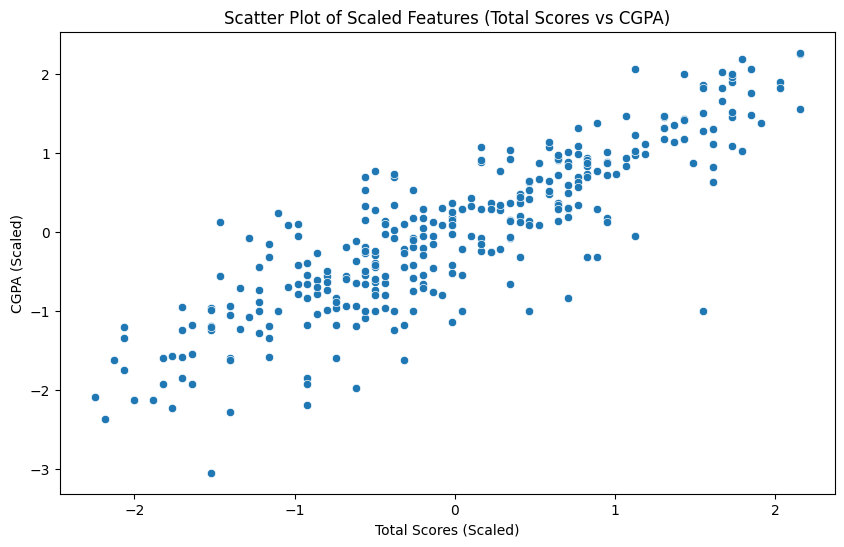

In [85]:
# Step 2: Convert the scaled data back into a DataFrame
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=['Total Scores', 'CGPA'])

# Step 3: Visualize the scaled features using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total Scores', y='CGPA', data=X_train_scaled_df)
plt.title('Scatter Plot of Scaled Features (Total Scores vs CGPA)')
plt.xlabel('Total Scores (Scaled)')
plt.ylabel('CGPA (Scaled)')
plt.show()

In [86]:
np.random.seed(1)
initial_w = 0.01 * (np.random.rand(2) - 0.5)
initial_b = -8

# Some gradient descent settings
iterations = 100000
alpha = 0.001

w,b, J_history,_ = gradient_descent(X_train_scaled ,y_train, initial_w, initial_b, 
                                   compute_cost, compute_gradient, alpha, iterations, 0)

Iteration    0: Cost     3.67   
Iteration 10000: Cost     0.80   
Iteration 20000: Cost     0.44   
Iteration 30000: Cost     0.36   
Iteration 40000: Cost     0.33   
Iteration 50000: Cost     0.31   
Iteration 60000: Cost     0.31   
Iteration 70000: Cost     0.30   
Iteration 80000: Cost     0.30   
Iteration 90000: Cost     0.30   
Iteration 99999: Cost     0.30   


###  4.7 Plotting the decision boundary

In [87]:
print(X_train_scaled.shape)  
print("Shape of w:", w.shape)
print("Value of b:", b)

(320, 2)
Shape of w: (2,)
Value of b: -0.4290581042494189


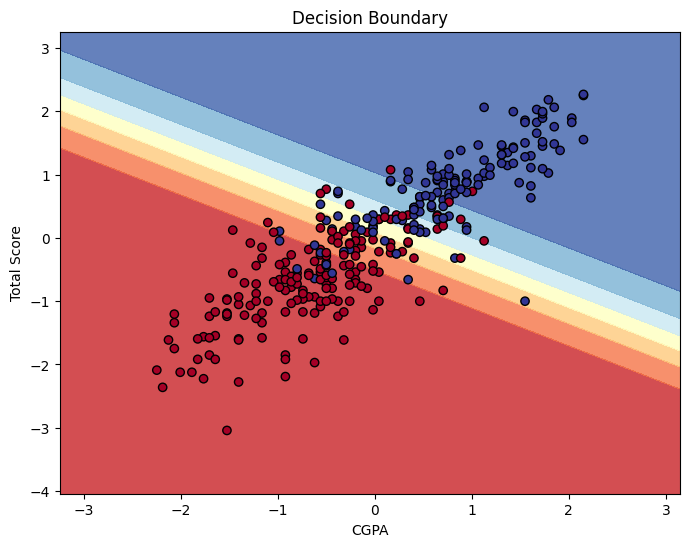

In [88]:
def plot_decision_boundary(X, y, w, b):
    plt.figure(figsize=(8, 6))
    
    # Set the limits of the graph
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    # Create a grid of points
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    Z = sigmoid(np.dot(np.c_[xx.ravel(), yy.ravel()], w) + b)
    Z = Z.reshape(xx.shape)
    
    # Plot the contour
    plt.contourf(xx, yy, Z, alpha=0.8, cmap='RdYlBu')
    
    # Plot the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap='RdYlBu')
    
    plt.title('Decision Boundary')
    plt.xlabel('CGPA')
    plt.ylabel('Total Score')
    plt.show()

# Call the function to plot
plot_decision_boundary(X_train_scaled, y_train, w, b)


## 5 - Evaluation

In [90]:
def predict(X, w, b): 
    """
    Predict whether the label is 0 or 1 using learned logistic
    regression parameters w
    
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      w : (ndarray Shape (n,))  values of parameters of the model      
      b : (scalar)              value of bias parameter of the model

    Returns:
      p : (ndarray (m,)) The predictions for X using a threshold at 0.5
    """
    # number of training examples
    m, n = X.shape   
    p = np.zeros(m)
   
     # Loop over each example
    for i in range(m):   
        z_wb = 0  # Initialize the linear combination

        # Loop over each feature
        for j in range(n): 
            # Add the corresponding term to z_wb
            z_wb += w[j] * X[i, j]  # Calculate w[j] * X[i][j]
        
        # Add bias term 
        z_wb += b  # Include the bias term
        
        # Calculate the prediction for this example
        f_wb = sigmoid(z_wb)  # Apply the sigmoid function

        # Apply the threshold
        p[i] = 1 if f_wb >= 0.5 else 0  # Set prediction based on threshold
    return p

##### 5.1 Accuracy

In [100]:
#Compute accuracy on our training set
p = predict(X_train_scaled, w,b)
print('Train Accuracy: %f'%(np.mean(p == y_train) * 100))

Train Accuracy: 85.937500


In [99]:
#Evaluate the model on the test set
test_predictions = predict(X_test_scaled, w, b)  
test_accuracy = np.mean(test_predictions == y_test) * 100
print(f'Test Accuracy: {test_accuracy:.2f}%')

Test Accuracy: 93.75%


##### 5.2 Confusion Matrix

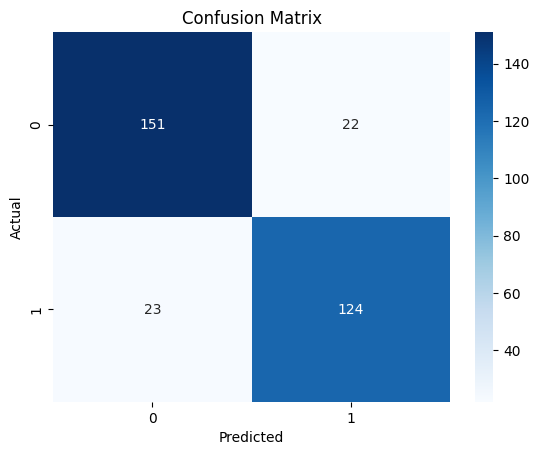

In [93]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate predictions using your predict function
y_pred_train = predict(X_train_scaled, w, b)

# Create the confusion matrix
conf_matrix = confusion_matrix(y_train, y_pred_train)

# Visualize the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [102]:
# Test set evaluation
y_pred_test = predict(X_test_scaled, w, b)  # Manual prediction function
y_prob_test = sigmoid(np.dot(X_test_scaled, w) + b)  # For log-loss and AUC-ROC

##### 5.3 Precision, Recall, and F1-Score

In [103]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_train, y_pred_train)
recall = recall_score(y_train, y_pred_train)
f1 = f1_score(y_train, y_pred_train)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Precision: 0.85
Recall: 0.84
F1 Score: 0.85


In [104]:
# Compute precision, recall, F1-score
test_precision = precision_score(y_test, y_pred_test)
test_recall = recall_score(y_test, y_pred_test)
test_f1 = f1_score(y_test, y_pred_test)
print(f"Test Precision: {test_precision:.2f}")
print(f"Test Recall: {test_recall:.2f}")
print(f"Test F1-Score: {test_f1:.2f}")

Test Precision: 0.91
Test Recall: 0.94
Test F1-Score: 0.93


Precision: The precision score of 0.91 shows that 91% of the students predicted to be admitted were actually admitted,
highlighting the model's accuracy in positive class predictions.

Recall: The model achieved a high recall of 0.94, meaning it successfully identified 94% of all admitted students, 
which is crucial in this context where missing an actual admission is more costly.

F1-Score: The balanced F1-score of 0.93 provides a robust overall measure that balances both precision and recall, 
indicating the model performs well across both metrics.

##### 5.4 Log-Loss (Cross-Entropy Loss)

In [106]:
def predict_proba(X, w, b):
    """
    Predict the probabilities of label being 1 using logistic regression parameters w and b.
    
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      w : (ndarray Shape (n,))  values of parameters of the model      
      b : (scalar)              value of bias parameter of the model

    Returns:
      proba : (ndarray (m,)) The probabilities for X
    """
    m, n = X.shape
    proba = np.zeros(m)
    
    for i in range(m):
        z_wb = np.dot(w, X[i]) + b
        proba[i] = sigmoid(z_wb)
        
    return proba


In [107]:
from sklearn.metrics import log_loss

# Get predicted probabilities using the predict_proba function
y_prob_train = predict_proba(X_train_scaled, w, b)

# Calculate log-loss using the predicted probabilities
logloss = log_loss(y_train, y_prob_train)

print(f"Log-Loss: {logloss:.2f}")


Log-Loss: 0.30


In [108]:
# Compute log-loss
test_logloss = log_loss(y_test, y_prob_test)
print(f"Test Log-Loss: {test_logloss:.2f}")

Test Log-Loss: 0.21


Log-Loss: The log-loss value of 0.21 reflects the model's confidence in its predictions, with lower values indicating more accurate predictions with higher confidence.

##### 5.5 ROC Curve and AUC (Area Under the Curve)

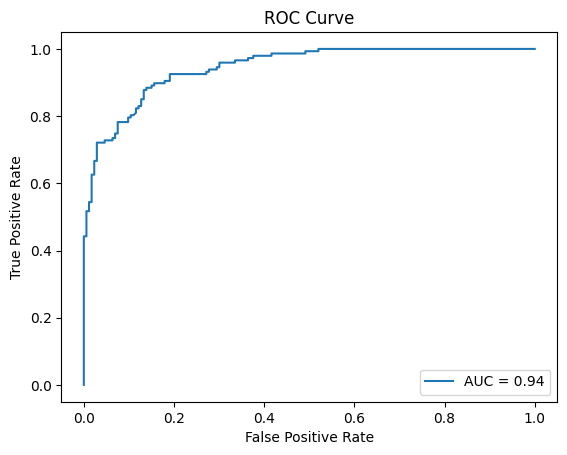

In [109]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_train, y_prob_train)
auc = roc_auc_score(y_train, y_prob_train)

# Plot the ROC curve
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()


In [110]:
# Compute AUC-ROC
test_auc = roc_auc_score(y_test, y_prob_test)
print(f"Test AUC: {test_auc:.2f}")

Test AUC: 0.98


AUC-ROC: The model achieved an impressive AUC of 0.98, indicating a strong ability to distinguish between students who were admitted and those who were not across all thresholds.

## 6- Train the model using LogisticRegression() 

in this project i've manually implemented logistic regression using gradient descent to find the optimal parameters 
𝑤 and b. This approach involves calculating the cost function (log-loss) and updating the parameters iteratively to minimize the cost.

in this part , we will compare with my manual implementation of the model and the LogisticRegression() from scikit-learn.

In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Create a LogisticRegression model
log_reg = LogisticRegression()

# Perform 5-fold cross-validation and evaluate accuracy
cv_scores = cross_val_score(log_reg, X_train_scaled, y_train, cv=5, scoring='accuracy')

# Fit the model
log_reg.fit(X_train_scaled, y_train)

# Predictions
y_pred_log_reg = log_reg.predict(X_train_scaled)

# Calculate accuracy
train_accuracy = log_reg.score(X_train_scaled, y_train)
print(f"LogisticRegression Train Accuracy: {train_accuracy * 100:.2f}%")


LogisticRegression Train Accuracy: 85.94%


 ##### Cross-Validation

In [112]:
# Cross-validation accuracy
print(f"Cross-Validation Accuracy: {cv_scores.mean() * 100:.2f}%")

Cross-Validation Accuracy: 85.62%


##### Note
The close train accuracies (85.93750087 for my manual implementation and 85.94% for the LogisticRegression from the library) indicate the validity and reliablility of my manual implementation .

### Conclusion 

In this project, I manually implemented a logistic regression model using gradient descent to predict university admissions based on applicants' scores and CGPA. The model was evaluated with various metrics, including accuracy, precision, recall, F1 score, log-loss, and AUC. The results were impressive, achieving a train accuracy of 85.94% and a test accuracy of 93.75%.

To validate the manual implementation, I also used the LogisticRegression class from the scikit-learn library. The performance metrics were very similar, indicating that the custom model effectively captured the data's underlying patterns.

The high test accuracy demonstrates the model's ability to generalize well to unseen data. Comparing the manual implementation with the library version not only confirms the reliability of the custom approach but also deepens understanding of the mathematical principles behind logistic regression.